In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
date_range = pd.date_range(start = '2010-01-01', end = '2020-12-01', freq = 'MS')
sales = np.linspace(100, 500, num=len(date_range)) + np.random.normal(0, 20, len(date_range))

data = pd.DataFrame({'Date': date_range, 'Sales': sales})
data.set_index('Date', inplace=True)

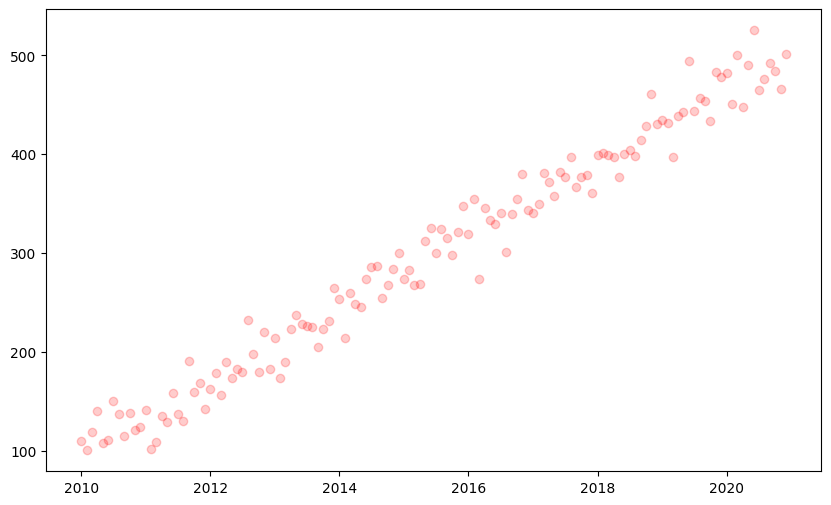

In [4]:
plt.figure(figsize = (10, 6))
plt.plot(data['Sales'], marker='o', alpha=0.2, linestyle='none', color='red', label='Sales Data')
plt.show()

In [6]:
#Apply moving average

data['MA6'] = data['Sales'].rolling(window=6).mean()
data['MA24'] = data['Sales'].rolling(window=24).mean()
data['EMA6'] = data['Sales'].ewm(span=6, adjust=False).mean()
data['SMA'] = data['Sales'].rolling(window=24, center=True).mean()

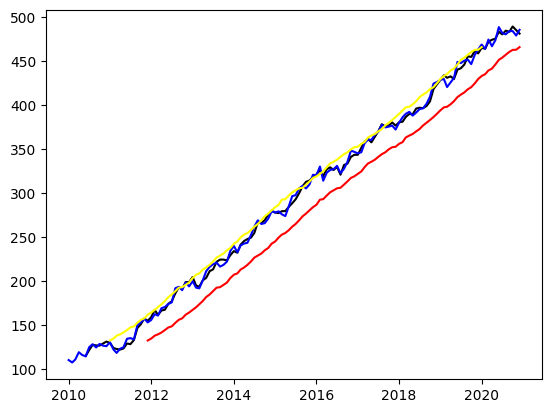

In [8]:
plt.plot(data['MA6'], label='6-month Moving Average', color='black')
plt.plot(data['MA24'], label='24-month Moving Average', color='red')
plt.plot(data['EMA6'], label='6-month exponenetial Moving Average', color='blue')
plt.plot(data['SMA'], label='6-month symmetric Moving Average', color='yellow')

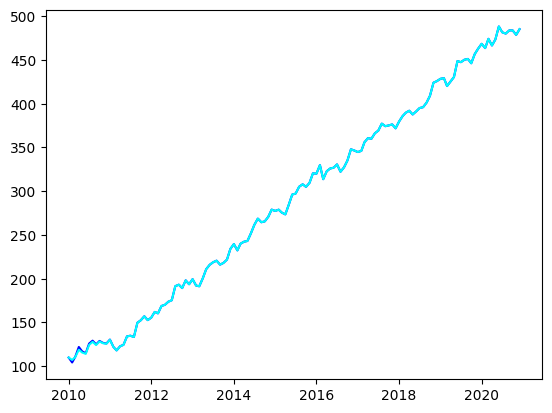

In [10]:
#Checking what happens with adjust != False
data['EMA6-2'] = data['Sales'].ewm(span=6).mean()
plt.plot(data['EMA6-2'], label='6-month exponenetial Moving Average', color='blue')
plt.plot(data['EMA6'], label='6-month exponenetial Moving Average', color='cyan')